
# Project: Investigate a Dataset (tmbd-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I am going to analyze the dataset tmbd-movies. 
>tmbd-moives data set contains information about 10,000 movies collected from The Movie Database (TMDb).In total this data set has 21 columns including user ratings,revenue,budget,runtime,geners etc.
>Through our analysis we will try to answer some interesting questions relating to this data set.
### Questions that we will try to answer
      1) Which genres are most profitable?
      2) What is the average user rarting of Top 100 most profitable movies?
      3) What is the average runtime of Top 100 most profitable movies?
      4) Which year was most successful in terms of revenue?
      5) Most popular genres in terms of no. of movies released ?
      6) Top 10 Highest Rated Movies ?
      


<a id='wrangling'></a>
## Python Packages 

> We will use the following python packages Pandas,Numpy,Matplotlib & Seaborn for our analysis.


In [1]:
#importing required packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv(r'C:\Users\rkumar35\Udacity Project 2\Data Set\tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


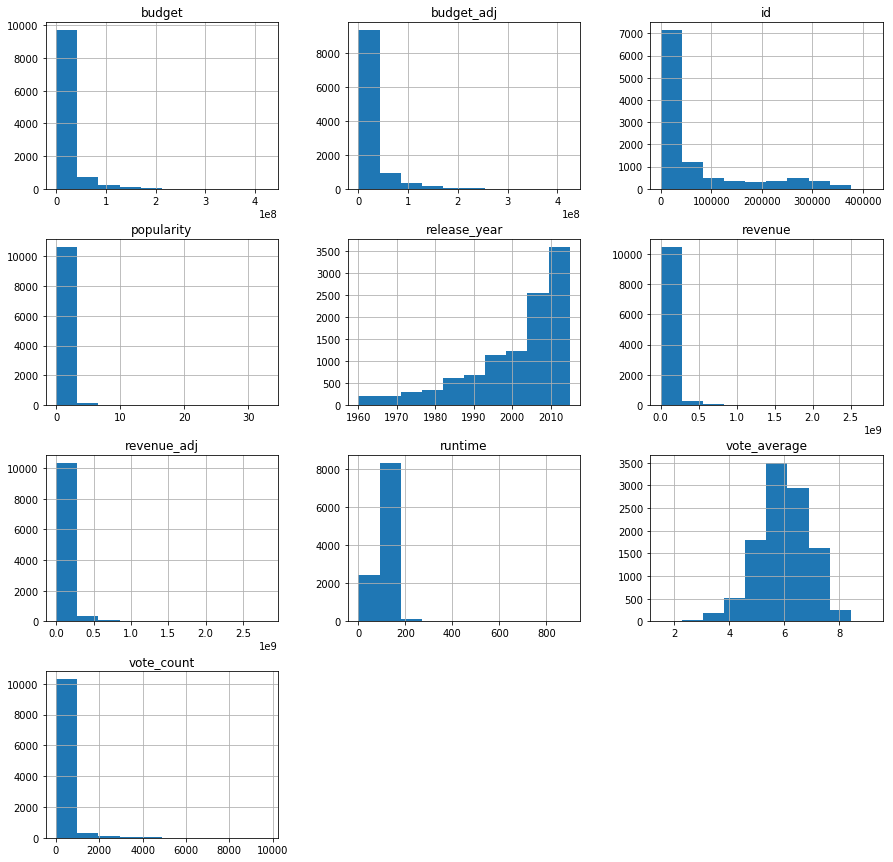

In [6]:
df.hist(figsize=(15,15));

<a id='Observations'></a>
### Observations from dataset
#### After going through the data set we have made the followinfg observations.

##### 1) Some columns are not essential for our data analysis and hence we have decided to remove them.
         *homepage
         *tagline
         *keywords
         *overview
         *imdb_id
         *production_companies ( though this column could have helped us answer interesting questions like which production            company is the most profitable or in loss but because 10% of our data rows are missing we will drop this column)
##### 2) Selecting between Columns budget,revenue and budget_adj,revenue_adj
        We have multiple columns specifying the same thing such as Columns named budget,revenue
        and budget_adj,revenue_adj. We have assumed that the columns budget_adj & revenue_adj 
        are adjusted according to the current market inflation and hence will provide a better
        option to analyse revenue or budgets of movies which have released in different years.
        This is purely our assumption the data set doesnot specify anything regarding this.
        So in addition to point 1) we will remove the columns revenue and budget as well.
        
##### 3) Genres column has multiple values in some rows seprated by ' | ' 
        We will seprate the values and consider the first value as the genre of the movie.


##### 4) NaN and 0 values
        
        df.info() and df.describe() indicates there are lots of columns with null and zero values hence we will have to    
        handle them.
       

      
   



### Data Cleaning (Replace this with more specific notes!)

In [7]:
# Here we are removing/dropping colums not essential for our analysis

df.drop(['cast','homepage','tagline','keywords','overview','imdb_id','production_companies','budget','revenue'],axis=1,inplace=True)

df.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


In [9]:
# Dropping rows with Null Values
df['director'].replace(0, np.NAN, inplace=True)
df['genres'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)


In [10]:
# Checking the data to ensure there are no rows with Null Values
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
id                10801 non-null int64
popularity        10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.00000,10801.000000,1.080100e+04,1.080100e+04
mean,65574.018609,0.649450,102.188779,218.590686,5.97079,2001.290343,1.765551e+07,5.167244e+07
std,91752.107716,1.002395,30.782604,577.139279,0.93301,12.819226,3.438265e+07,1.450123e+08
min,5.000000,0.000188,0.000000,10.000000,1.50000,1960.000000,0.000000e+00,0.000000e+00
25%,10571.000000,0.209163,90.000000,17.000000,5.40000,1995.000000,0.000000e+00,0.000000e+00
50%,20465.000000,0.385492,99.000000,39.000000,6.00000,2006.000000,0.000000e+00,0.000000e+00
75%,74725.000000,0.717479,111.000000,147.000000,6.60000,2011.000000,2.103337e+07,3.408478e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.20000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
#replacing zero values in columns runtime,revenue_adj and budget_adj with their respective means
df['runtime'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df.fillna(df.mean(), inplace=True)


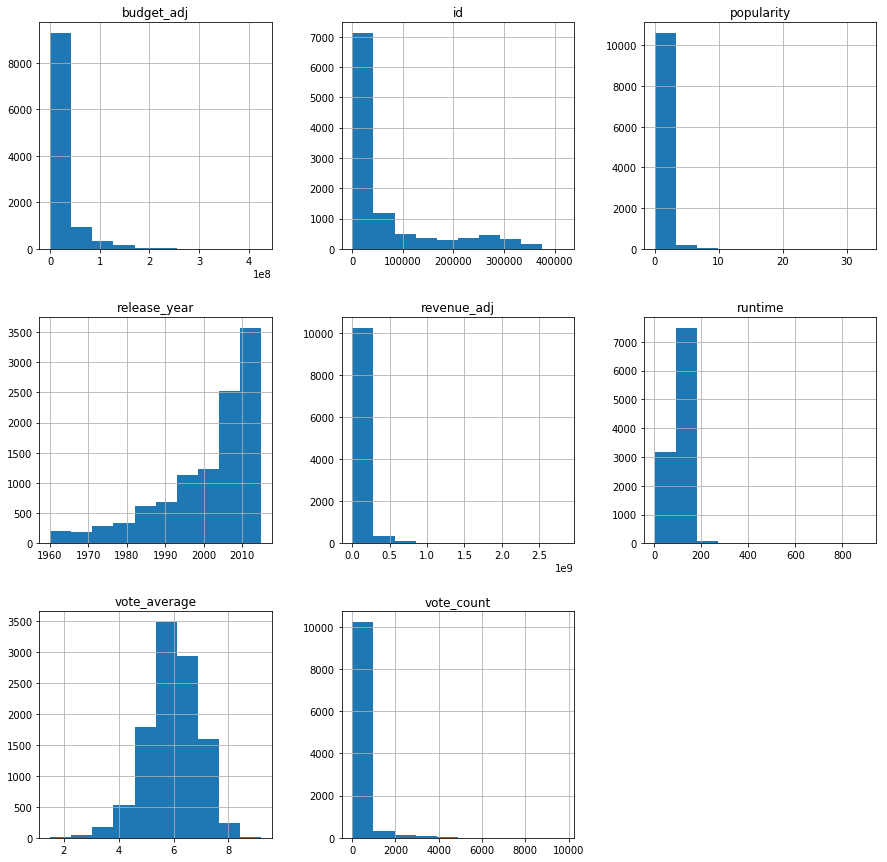

In [12]:
df.describe()
df.head()

df.hist(figsize=(15,15));

In [13]:
# seprating multiple values in genres column seprated by '|' and taking only the first value which appears as genres
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genres
#replacing genres column with genres_1
df['genres']=df_genres['genres_1']
df.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119.0,Adventure,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137.0,Action,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most profitable?

In [14]:
# Calculating profit and creating a new column for it
df['Profit']=df['revenue_adj']-df['budget_adj']
df.head()


,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119.0,Adventure,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,James Wan,137.0,Action,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


In [15]:
#Calculating the mean revenue of each genre
profitable_genre=df['Profit'].groupby(df['genres']).agg({'Count_films':'count', 'Profit_Sum': 'sum','Genre_Mean':'mean'}).reset_index()
result=profitable_genre.sort_values('Genre_Mean',ascending=False)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,genres,Count_films,Profit_Sum,Genre_Mean
1,Adventure,586,8.790879e+10,1.500150e+08
15,Science Fiction,212,2.402783e+10,1.133388e+08
2,Animation,398,4.420896e+10,1.110778e+08
7,Family,142,1.546891e+10,1.089360e+08
8,Fantasy,272,2.585082e+10,9.503979e+07
0,Action,1587,1.341122e+11,8.450673e+07
10,History,44,3.690975e+09,8.388581e+07
16,TV Movie,74,5.889603e+09,7.958922e+07
9,Foreign,9,7.035997e+08,7.817774e+07
14,Romance,185,1.424778e+10,7.701502e+07


#### Question 1 Conclusion:
From the above result we can see that the most profitable genres are:

    1) Adventure
    2) Science Fiction
    3) Animation
    4) Family 
    5) Fantasy 

### Research Question 2:  What is the average user rating of Top 100 most profitable movies?

In [16]:
# creating a dataframe top_100 with top 100 most profitable movies and then calculating their average rating
df_1=df
# sorting values on profit 
df_1=df_1.sort_values(by=['Profit'],ascending=False)
# creating a dataframe consisting top 100 most profitable movies
top_100=df_1.head(100)
# calculating the average rating of top 100 most profitable movies
top_100['vote_average'].agg({'Average_Rating':'mean'})


Average_Rating    6.994
Name: vote_average, dtype: float64

##### Question 2 conclusion : 
 Average Rating of Top 100 most profitable movies is 6.994

### Research Question 3:  What is the average runtime of Top 100 most profitable movies?

In [17]:
# creating a dataframe top_100 with top 100 most profitable movies and then calculating their average runtime
df_1=df
df_1=df_1.sort_values(by=['Profit'],ascending=False)
top_100=df_1.head(100)
top_100['runtime'].agg({'Average_Runtime':'mean'})


Average_Runtime    130.5
Name: runtime, dtype: float64

##### Question 3 conclusion : 
Average Runtime of Top 100 most profitable movies is 130.5

### Research Question 4: Which year was most successful in terms of revenue?

In [18]:
# Calculating the sum of revenue year wise 
revenue_year=df['revenue_adj'].groupby(df['release_year']).agg({'Revenue_Sum': 'sum','Count':'count'}).reset_index()
result=revenue_year.sort_values('Revenue_Sum',ascending=False)
result['Revenue_Sum']='$'+(result['Revenue_Sum'].astype(float)/1000000).round(2).astype(str)+ "MM"
result.head(10)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,release_year,Revenue_Sum,Count
54,2014,$76047.24MM,694
55,2015,$71581.75MM,624
53,2013,$70083.73MM,652
52,2012,$65439.76MM,581
49,2009,$60296.34MM,528
51,2011,$57269.9MM,539
48,2008,$52241.98MM,488
50,2010,$52115.88MM,480
47,2007,$48038.35MM,435
46,2006,$40854.92MM,408


##### Question 4 conclusion : 
The above result shows that 2014 was the most successfull year in terms of revenue.

### Research Question 5: Most popular genres in terms of no. of movies released ?

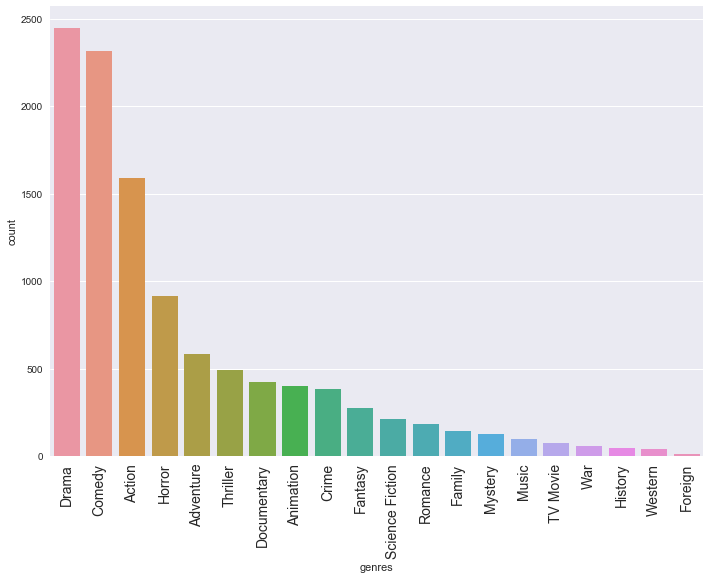

In [19]:
#plotting a bar chart to display the most popular genres in terms of no. of movies released
genres_order = df['genres'].value_counts().index
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df, x = 'genres',order=genres_order)
plt.xticks(fontsize=14, rotation=90);


##### Question 5 conclusion : 
The above bar cahrt shows that Drama, Comedy, Action and Horror are some of the most popular genres.

### Research Question 6: Top 10 Highest Rated Movies ?

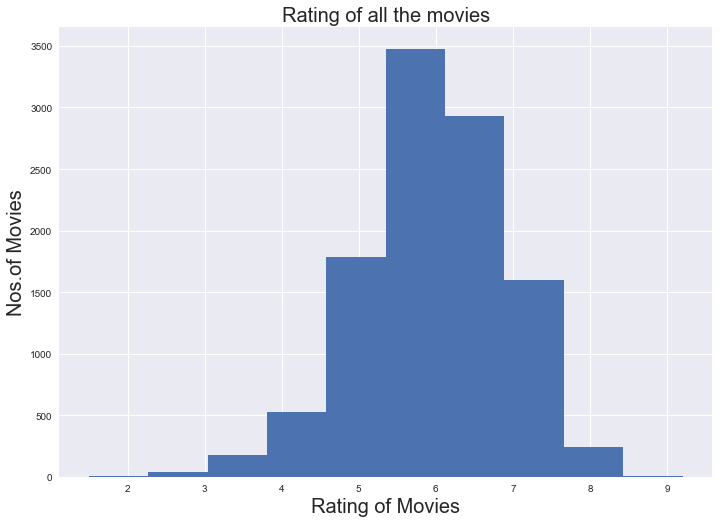

In [20]:
#On x-axis 
plt.xlabel('Rating of Movies', fontsize = 20)
#On y-axis 
plt.ylabel('Nos.of Movies', fontsize=20)

plt.title('Rating of all the movies', fontsize=20)
plt.hist(data = df, x = 'vote_average');



From the above hsitogram we can see that majority of movies got a rating between 5 to 7. Now let's see the top 10 highest rated movies

In [21]:
df_1=df
#sorting values on vote_average
df_1=df_1.sort_values(by=['vote_average'],ascending=False)
# creating a dataframe of top 10 highest rated movies
top_10=df_1.head(10)
top_10


,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins,900.0,Documentary,9/3/2011,14,9.2,2011,3.692105e+07,1.150988e+08,7.817774e+07
538,224972,0.114264,The Mask You Live In,Jennifer Siebel Newsom,88.0,Documentary,1/1/2015,11,8.9,2015,3.692105e+07,1.150988e+08,7.817774e+07
2269,51299,0.222293,Life Cycles,Derek Frankowski,47.0,Documentary,10/2/2010,27,8.8,2010,3.692105e+07,1.150988e+08,7.817774e+07
1200,374430,0.129531,Black Mirror: White Christmas,Carl Tibbetts,74.0,Drama,12/16/2014,41,8.8,2014,3.692105e+07,1.150988e+08,7.817774e+07
6911,24970,0.212010,Pink Floyd: Pulse,David Mallet,145.0,Music,7/9/2006,23,8.7,2006,3.692105e+07,1.150988e+08,7.817774e+07
8839,16275,0.157001,Dave Chappelle: Killin' Them Softly,Stan Lathan,57.0,Comedy,1/1/2000,17,8.5,2000,3.692105e+07,1.150988e+08,7.817774e+07
8411,25093,0.302908,Queen - Rock Montreal,Saul Swimmer,138.0,Music,11/24/1981,14,8.5,1981,3.692105e+07,1.150988e+08,7.817774e+07
8221,55676,0.194889,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225.0,Documentary,5/21/1995,11,8.5,1995,3.692105e+07,1.150988e+08,7.817774e+07
3690,68450,0.321341,The Art of Flight,Curt Morgan,80.0,Adventure,9/8/2011,60,8.5,2011,3.692105e+07,1.150988e+08,7.817774e+07
4178,278,7.192039,The Shawshank Redemption,Frank Darabont,142.0,Drama,9/10/1994,5754,8.4,1994,3.677779e+07,4.169346e+07,4.915674e+06


##### Question 6 conclusion :
The above result depicts the top 10 highest rated movies with The Story of Film: An Odyssey being the highest rated movie with a rating of 9.2

<a id='conclusions'></a>
## Conclusions

This data analysis process was challenging as well as fun.We came to know some very interesting parameters on which the success of movies depends. From the questions we asked we came to know about some interesting findings lsited below:

    1) Movies with runtime close to 2 hours are the most successfull interms of revenue.
    2) The most popular genres among audiences and movie creators are Drama, Comedy, Action and Horror where as the most 
       profitable genres are Adventure,Science Fiction,Animation,Family and Fantasy.
    3) Most of the movies get a user rating between 5 to 7 on the scale of 10 and the top 100 most profitable movies have a 
       average rating of 7.
   #### Limitations
   Though the conclusions made are true for the dataset used but these results cannot be genralized for all the movies 
   released till date. The data used required cleaning before it could be used as it was not in perfect shape. There were 
   assumptions made about data such as the revenue and budget is in dollar and revenue_adj and budget_adj are adjusted 
   according to latest inflation rate so as to provide a fair comparison among movies released in different years.
   